# EDA COVID PROJECT

## Imports

In [6]:
# Path
sys.path.append(os.path.dirname(os.path.dirname('D:\\Data Science\\Covid_Group_Project_E\\notebooks\\')))

# Imports
import pandas as pd
import sys
import os
from src.utils import folders_tb as ft
from src.utils import mining_data_tb as mdt

# Create objects
variable_creator = ft.Folders()
variable_miner = mdt.Miner()

## Get and clean data

In [7]:
# Assign the df to a first variable called first_visualitation
first_visualitation = variable_creator.open_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Clean the dataframe in order to have just the asked countries
df_required_countries = variable_miner.chosen_countries(first_visualitation,'location', 'Poland', 'South Africa', 'Ukraine', 'Indonesia', 'Spain')

# Turn the date column (string) into datetime.
df_required_countries = variable_miner.column_to_datetime(df_required_countries, 'date')

# Pivot table with date and countries as index (evolution per date)
date_location_pivot_table = variable_miner.pivot_table_date_location(df_required_countries,'date', 'location')

# Better visualitation of the dataframe having the countries as index
df_required_countries = variable_miner.set_index_1(df_required_countries, 'location')

## Plot tests

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

df = df_required_countries
df

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Poland,POL,Europe,2020-03-04,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-05,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-06,5.0,4.0,NaN,NaN,NaN,NaN,0.132,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-07,5.0,0.0,NaN,NaN,NaN,NaN,0.132,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-08,11.0,6.0,NaN,NaN,NaN,NaN,0.291,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain,ESP,Europe,2021-01-15,2252164.0,40197.0,28829.143,53314.0,235.0,205.714,48169.703,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
Spain,ESP,Europe,2021-01-16,2252164.0,0.0,28829.143,53314.0,0.0,205.714,48169.703,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
Spain,ESP,Europe,2021-01-17,2252164.0,0.0,28829.143,53314.0,0.0,205.714,48169.703,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


In [9]:
country_list = list(df_required_countries.index.unique())

In [10]:
country = country_list[3]
c_df = df.loc[df.index == country]

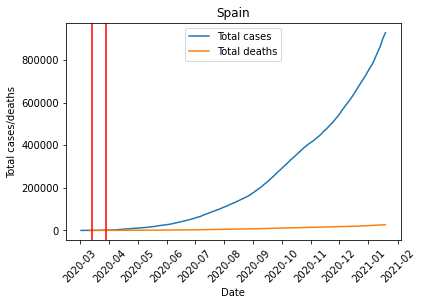

In [11]:
plot = sns.lineplot(x=c_df["date"], y=c_df["total_cases"], label="Total cases")
sns.lineplot(x=c_df["date"], y=c_df["total_deaths"], label="Total deaths")
plt.xticks(rotation=45)
plot.set(title="Spain", xlabel="Date", ylabel="Total cases/deaths")
plt.legend()

plt.axvline(dt.datetime(2020, 3, 14), c="r")

plt.axvline(dt.datetime(2020, 3, 28), c="r")

plt.show()

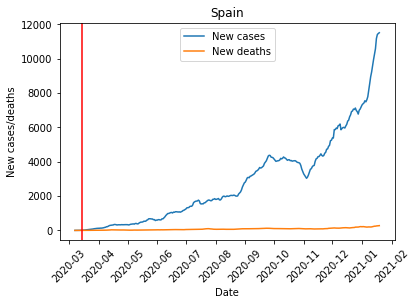

In [12]:
plot = sns.lineplot(x=c_df["date"], y=c_df["new_cases_smoothed"], label="New cases")
sns.lineplot(x=c_df["date"], y=c_df["new_deaths_smoothed"], label="New deaths")
plt.xticks(rotation=45)
plot.set(title="Spain", xlabel="Date", ylabel= "New cases/deaths")
plt.legend()

plt.axvline(dt.datetime(2020, 3, 14), c="r")

plt.show()

In [13]:
#removing constant columns
c_df = df.loc[df.index == country_list[-1]]
c_df.drop(columns=["iso_code", "continent", "human_development_index", "life_expectancy", "hospital_beds_per_thousand", \
                   "handwashing_facilities", "male_smokers", "female_smokers", "diabetes_prevalence", "cardiovasc_death_rate",\
                   "extreme_poverty", "gdp_per_capita", "aged_70_older", "aged_65_older", "median_age", "population_density", \
                   "population", "tests_per_case", "tests_units"], inplace = True)

list(c_df.columns)

['date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'total_vaccinations',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index']

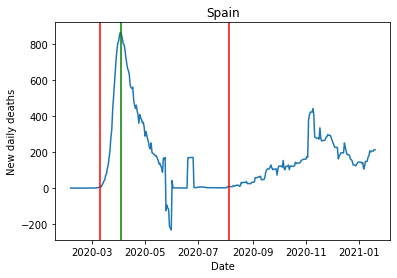

In [68]:
#SPAIN
dates = [dt.datetime(2020, 3, 10), dt.datetime(2020, 4, 3), dt.datetime(2020, 8, 5), dt.datetime(2020, 11, 6), dt.datetime(2020, 12, 28)]

#POLAND
#dates = [dt.datetime(2020, 3, 30), dt.datetime(2020, 4, 28), dt.datetime(2020, 9, 25), dt.datetime(2020, 11, 25), dt.datetime(2020, 12, 28)]

#SOUTH AFRICA
#dates = [dt.datetime(2020, 5, 15), dt.datetime(2020, 8, 9), dt.datetime(2020, 9, 28), dt.datetime(2020, 10, 14), dt.datetime(2020, 12, 1)]

#UKRAINE
#dates = [dt.datetime(2020, 3, 26), dt.datetime(2020, 12, 13), dt.datetime(2021, 1, 12)]

#INDONESIA
#dates = [dt.datetime(2020, 3, 10), dt.datetime(2020, 9, 25), dt.datetime(2020, 11, 12)]


colors = ["r" if i%2==0 else "g" for i in range(len(dates))]
plot_tendency(c_df["date"], [c_df["new_deaths_smoothed"]], "Date", \
              "New daily deaths", ["New deaths"], 0, country, dates, \
              "C:\\Users\\Dexyu\\Desktop\\test.jpg", 3, colors, vline=True, legend=False)

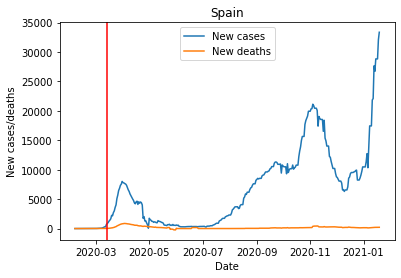

In [67]:
plot_tendency(c_df["date"], [c_df["new_cases_smoothed"], c_df["new_deaths_smoothed"]], "Date", \
              "New cases/deaths", ["New cases", "New deaths"], 0, "Spain", [dt.datetime(2020, 3, 14)], "C:\\Users\\Dexyu\\Desktop\\test.jpg", 1, vline=True, legend=True)

In [22]:
def plot_tendency(x, y_series, x_label, y_label, set_labels, label_rotation, title, date, path, vlines, vline_colors = ["r"], vline = False, legend = True):
    """ Make a lineplot of one or several series. Vertical lines can be added.
        Saves the plot to file. Made by @AntonioLealDev

        Args: x [(pd.Series)]: Series for x axis
              y [(list)]: List of series to be plotted in the y axis
              x_label [(str)]: Label for the x axis
              y_label [(str)]: Label for the y axis
              set_labels[(list)]: List of string for series labels
              label_rotation[(float)]: Rotation for the x axis labels
              title[(str)]: Plot title
              date[list]: List of datetimes for vertical lines
              path[(str)]: Path where the plot will be saved
              vlines[(int)]: Number of vertical lines
              vline_colors[(list)]: List of strings representing vertical line colors
              vline[(bool)]: True: draw vertical line, False: otherwise (default False)
        
        Returns: None
    """
    # Setting lineplots
    plot = plt.figure()
    for i in range(len(y_series)):
        sns.lineplot(x=x, y=y_series[i], label=set_labels[i])

    # Setting axes
    plt.xticks(rotation=label_rotation)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add legend
    if not legend:
        plt.legend("", frameon=False)

    # Add vertical line
    if vline:
        for i in range(vlines):
            plt.axvline(date[i], c=vline_colors[i])

    # Save plot to file
    plot.savefig(path, dpi=plot.dpi)

In [24]:
import plotly.express as px

In [25]:
def make_barplot(data, x, y, x_label, y_label, title):
    """ Makes plotly barplot and saves it.

        Creator: @AntonioLealDev

        Args: data[(DataFrame)]: Dataframe to be plotted
              x[(string)]: Name of the column to be used as x axis
              y[(string)]: Name of the column to be used as y axis
              x_label[(string)]: X-axis label
              y_label[(string)]: Y-axis label
              title[(string)]: Plot title

        Returns: none
    """
    fig = px.bar(data, x=x, y=y, template="seaborn",\
             labels={
                 y:"<b>"+ y_label +"</b>",
                 x:"<b>"+ x_label +"</b>",
             },
             title='<span style="font-size: 26px;"><b>'+title+'</b></span>')

    fig.update_layout(title={"y":0.92})
    fig.show()

In [26]:
def make_lineplot(data, x, y, x_label, y_label, title):
    """ Makes plotly lineplot and saves it.

        Creator: @AntonioLealDev

        Args: data[(DataFrame)]: Dataframe to be plotted
              x[(string)]: Name of the column to be used as x axis
              y[(string)]: Name of the column to be used as y axis
              x_label[(string)]: X-axis label
              y_label[(string)]: Y-axis label
              title[(string)]: Plot title

        Returns: none
    """
    fig = px.line(data, x=x, y=y, template="seaborn",\
             labels={
                 y:"<b>"+ y_label +"</b>",
                 x:"<b>"+ x_label +"</b>",
             },
             title='<span style="font-size: 26px;"><b>'+country+'</b></span>')

    fig.update_layout(title={"y":0.92})
    fig.show()

In [32]:
def make_scatter(data, x, y, x_label, y_label, title):
    """ Makes plotly scatter plot and saves it to html

        Creator: @AntonioLealDev

        Args: data[(DataFrame)]: Dataframe to be plotted
              x[(string)]: Name of the column to be used as x axis
              y[(string)]: Name of the column to be used as y axis
              x_label[(string)]: X-axis label
              y_label[(string)]: Y-axis label
              title[(string)]: Plot title

        Returns: none
    """
    fig = px.scatter(data, x=x, y=y, template="seaborn",\
             labels={
                 y:"<b>"+ y_label +"</b>",
                 x:"<b>"+ x_label +"</b>",
             },
             title='<span style="font-size: 26px;"><b>'+country+'</b></span>')

    fig.update_layout(title={"y":0.92})
    fig.update_traces(marker=dict(size=4))
    fig.show()

In [33]:
make_barplot(c_df, "date", "new_cases_smoothed", "Date", "New cases", country)
make_lineplot(c_df, "date", "new_cases_smoothed", "Date", "New cases", country)
make_scatter(c_df, "date", "new_cases_smoothed", "Date", "New cases", country)
make_barplot(c_df, "date", "new_deaths_smoothed", "Date", "New deaths", country)
make_lineplot(c_df, "date", "new_deaths_smoothed", "Date", "New deaths", country)
make_scatter(c_df, "date", "new_deaths_smoothed", "Date", "New deaths", country)

In [29]:
# Create dataframe for pies 
dict_list = []
for country in country_list:
    temp_df = df.loc[df.index==country]
    dict_list.append({"Country":country, "AV_NewDeaths":temp_df["new_deaths"].mean(), "AV_NewCases":temp_df["new_cases"].mean()})

pie = pd.DataFrame(dict_list)
pie

,Country,AV_NewDeaths,AV_NewCases
0,Poland,107.318471,4483.863354
1,South Africa,128.053512,4226.529595
2,Ukraine,70.405751,3734.133127
3,Indonesia,84.412698,2862.283951
4,Spain,167.718266,6697.011299


In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

colors = ["#ff9633", "#8df877", "#52c8e8", "#6a5ef1", "#fa3939"]

def make_pies(data, p1_label, p2_label, p1_values, p2_values, colors):
    """
    """
    fig = make_subplots(rows=1, cols=2, specs=[[{"type":"pie"}, {"type":"pie"}]],
                        subplot_titles=['<b>Average daily deaths</b>', '<b>Average daily cases</b>'])

    fig.add_trace(go.Pie(labels=data["Country"], values=data["AV_NewDeaths"], pull=[0,0,0,0,0.1], hole=0.1), row=1, col=1)
    fig.add_trace(go.Pie(labels=data["Country"], values=data["AV_NewCases"], pull=[0,0,0,0,0.1], hole=0.1), row=1, col=2)

    fig.update_traces(hoverinfo='label+value', textinfo='percent', \
                    marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
    fig.update_layout(legend=dict(orientation="h", yanchor="bottom", xanchor="center", y=-0.1, x=0.5),
                    font=dict(color="Black"))
                    
    fig.show()

make_pies(pie, "Country", "AV_NewDeaths", "Country", "AV_NewCases", colors)

In [63]:
fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Scatter(x=c_df["date"], y=c_df["total_cases"], mode="lines", name="Total cases"), secondary_y=False)
fig.add_trace(go.Scatter(x=c_df["date"], y=c_df["total_deaths"], mode="lines", name="Total deaths"), secondary_y=True)
fig.add_trace(go.Scatter(x=c_df["date"], y=c_df["new_cases_smoothed"], mode="lines", name="New cases"), secondary_y=True)
fig.add_trace(go.Scatter(x=c_df["date"], y=c_df["new_deaths_smoothed"], mode="lines", name="New deaths"), secondary_y=True)

fig.add_annotation(x=dt.datetime(), y= 100, text="Hola", showarrow=True)

fig.show()

In [ ]:
fig = px.line(c_df, x="date", y=["total_cases", "new_cases_smoothed", "total_deaths", "new_deaths_smoothed"])
# fig.add_shape(type="line", x0=dt.datetime(2020, 3, 10), y0=-1000, x1=dt.datetime(2020, 3, 10), y1=500000,
#     line=dict(color="Red",width=3))
fig.show()

In [47]:
html = pie.to_html()

with open('C:\\Users\\Dexyu\\Desktop\\test.html', 'w') as file: 
    file.write(html) 

In [46]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

url = "https://covidly.com/"

fp = webdriver.FirefoxProfile()
fp.set_preference("browser.startup.homepage_override.mstone", "ignore") #avoid startup screen
fp.set_preference("startup.homepage_welcome_url.additional", "about:blank")

driver = webdriver.Firefox(firefox_profile=fp, executable_path="C:\\Python38\\geckodriver.exe")
driver.set_window_size(1120, 550)

driver.get(url)

In [50]:
from bs4 import BeautifulSoup
import requests

url = "https://covidly.com/"

def get_page_contents(url):
    page = requests.get(url, headers={"Accept-Language": "en-US"})
    return BeautifulSoup(page.text, "html.parser")

soup = get_page_contents(url)